# Notebook pour la dataviz en Python


## Objectifs du notebook
- Aborder les différents modules de représentation avec Python.
- Représenter des statistiques univariées.
- Représenter des données catégorielles.
- Représenter les résidus d'une régression linéaire.

## Introduction

Il existe plusieurs packages possibles pour la dataviz en Python :
- seaborn,
- matplotlib,
- plotly.
Ces trois là sont les plus utilisés dans la science des données.
Ils présentent des similarités et des différences. Mais on peut faire à peu près la même chose avec chacun d'eux. En somme, on choisira celui avec lequel on est le plus à l'aise pour la représentation de données.
On peut utiliser les fonctionnalités de Pandas pour faire de la représentation, mais Pandas propose des fonctions "basiques". Si on veut faire de l'exploration de données, si on a besoin de faire des graphiques plus "travaillés", on a besoin de packages de dataviz comme ceux cités plus haut.

Encore une fois, le choix du module nous revient. Mais il existe des forces et des faiblesses pour chaque module.

### Quelques explications sur les modules de représentation
#### Matplotlib
Matplotlib contient une classe pyplot, qui est très utilisé pour la représentation des données. Il est facile à prendre en main, comparé aux deux autres. Il nécessite d'utiliser l'une des deux commandes pour afficher les plots :
```
import matplotlib.pyplot as plt
%matplotlib inline
## afficher les plots sans matplotlib.pyplot.show(), dès exécution de la commande.
```
 
```
import matplotlib.pyplot as plt

## définir un graphique
## puis afficher le graphique si exécution :
plt.show()
```

Il convient pour des représentations graphiques "basiques" et qui ne demandent pas un style particulier. En somme, il convient lors d'un traitement, pour regarder les données. Mais il ne convient pas forcément pour un rapport.
Peut faire de la cartographie (cartopy).

#### Seaborn
Souvent considéré comme un module accompagnant Matplotlib. Il offre de plus beaux rendus.
Peut faire de la cartographie.

#### Plotly
Très puissant, et plus compliqué que les deux autres. Il dépasse la simple visualisation en intégrant des fonctionnalités d'exploration (pop-up, zoom, info-bulle etc). Il est plus compliqué à prendre en main, mais offre beaucoup de possibilités, dont des représentations dynamiques.
Il existe également chez JavaScript et R.


Points communs entre les trois modules
- ils peuvent cumuler les graphiques sur un seul espace,
- ils peuvent produire de nombreux graphiques,
- ils permettent de comparer des distributions.

Sources :
- cours sur la dataviz en Python en anglais : https://www.mygreatlearning.com/academy/learn-for-free/courses/data-visualization-using-python

In [1]:
import pandas
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) ## permet de paramétrer les couleurs de base de sns

##### Sommaire
- 1. [Documentation des données](#ch1)
- 2. [Inspection des données](#ch2)
- 3. [Dataviz : représentation univariée](#ch3)
    - 3.1 [Histogramme](#ch3_1)
- 4. [Dataviz : représentation bivariée](#ch4)
    - 4.1 [Jointplot](#ch4_1)
- 5. [Dataviz : représentation multivariée](#ch5)
    - 5.1 [Dataviz : ploter une variable continue et une variable catégorielle](#ch5_1)
- 6. [Dataviz : ploter une variable continue et une variable catégorielle](#ch6)
    - 6.1 [Comparer une variable catégorielle avec un stripplot](#ch6_1)
    - 6.2 [Comparer la distribution d'une variable catégorielle avec un swarmplot](#ch6_2)
    - 6.3 [Comparer la distribution d'une variable catégorielle avec un boxplot](#ch6_3)
    - 6.4 [Comparer la distribution d'une variable catégorielle avec un boxplot + hue](#ch6_4)
    - 6.5 [Comparer la dispersion d'une variable continue en fonction d'une variable catégorielle avec un barplot + hue](#ch6_5)
    - 6.6 [Inspecter la distribution d'une variable catégorielle avec un countplot](#ch6_6)
    - 6.7 [Etudier l'évolution d'une variable continue selon une variable catégorielle avec pointplot](#ch6_7)

## 1. Documentation des données <a class="anchor" id="ch1"></a>
- source : https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset?resource=download
- Voir répertoire DONNEES pour dictionnaire variable et note méthodologique.
- [Comment créer un sommaire dans un notebook Jupyter](https://fr.moonbooks.org/Articles/Comment-creer-une-table-des-matieres-au-debut-dun-Jupyter-notebook-/)

## 2. Inspection des données <a class="anchor" id="ch2"></a>
- avant de charger le jeu de données dans un notebook, ouvrir dans un tableur et regarder la documentation.
- Ce jeu de données concerne l'immobilier.

In [2]:
data = pandas.read_csv(".\\DONNEES\\data_real_estate.csv", sep=",", encoding="utf-8", decimal=".", header=0)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape ## attendu : 511 lignes, 14 colonnes

(511, 14)

In [53]:
data.dtypes ## type de données par variables.

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

En fait, les filtres sur des subets crées avec ["nom champ"] ne semblent pas super bien fonctionner.
Il faut utiliser la méthode .loc[] pour faire des filtres qui fonctionnent.

In [5]:
data.isna().sum() ## pas de NA
## Nous n'allons pas dresser de réelles statistiques sur ce jeu de données.
## Donc inutile de faire des statistiques descriptives préliminaires.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Comme on va pas tout traiter, on va se concentrer que sur une partie du jeu de données: tout ce qui est dans le 94.

## 3. Dataviz : représentation univariée<a class="anchor" id="ch3"></a>

Pourquoi s'intéreresser aux statistiques univariées ?
Ces éléments sont très importants pour comprendre comment la variable est distribuée. C'est une phase "pivot" car elle permet de mieux comprendre les données, les variables etc. Par exemple, un histogramme permet de voir la distribution de la donnée, les piechart permettent de voir comment une variable est "répartie".

### 3.1 Histogramme<a class="anchor" id="ch3_1"></a>

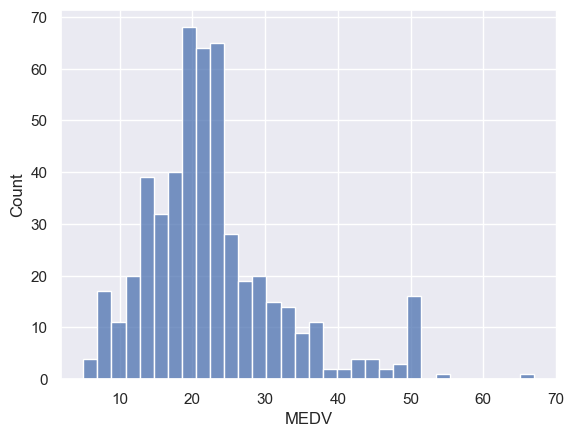

In [42]:
## Histogram :
## dans le cours, on propose sns.distplot() mais la méthode est dépréciée
##+ et sera supprimée des prochaines versions de seaborn. On utilisera plutôt sns.histplot() :
sns.histplot(data["MEDV"])
plt.show() ## pour rappel, sns est basé sur matplotlib.

Ici, on a un histogram plutôt simple.
- Les bins sont automatiquement crées,
- les bins sont visuellement délimités,
- mais pas de courbe de densité contrairement au sns.distplot().
- On pourrait aussi ajouter le KDE (kernel density estimation) qui est une méthode non paramétrique d'estimation de densité de probabilité d'une variable aléatoire.
Une densité de probabilité d'une variable aléatoire peut se définir comme étant la probabilité d'appartenance à un domaine comme étant un calcul de l'intégrale de ce domaine.

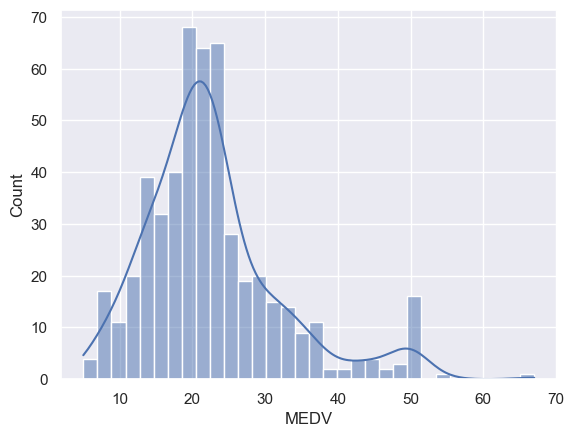

In [44]:
sns.histplot(data["MEDV"], kde=True)
plt.show() ## pour rappel, sns est basé sur matplotlib

On pourrait également rajouter le paramètre `rug=True`.
Ce paramètre va faire apparaître les entités là où elles sont placées dans le graphique.
Autrement dit, on va pouvoir voir la concentration des entités sur un histogram.

Là, on a essayé de comprendre la distribution pour une variable continue. Maintenant, on va regarder croiser la distribution de deux variables continues : analyse bivariée.

## 4. Dataviz : représentation bivariée<a class="anchor" id="ch4"></a>

Pourquoi faire ? On va regarder le comportement de deux variables continues l'une par rapport à l'autre.
Les graphiques bivariées nous permettent de voir s'il existe de structures sous-jacentes entre deux variables.
Par exemple : une croissance des deux en même temps, des évolutions opposées. Pour ça, on utilise le scatterplot.

### 4.1 Jointplot<a class="anchor" id="ch4_1"></a>

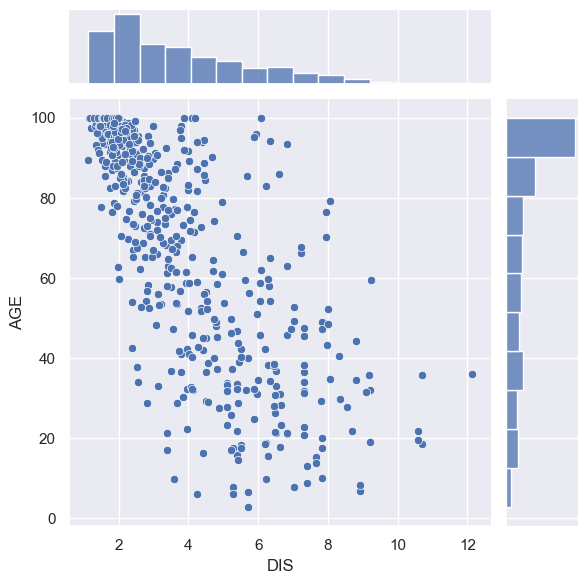

In [58]:
sns.jointplot(y=data["AGE"], x=data["DIS"])

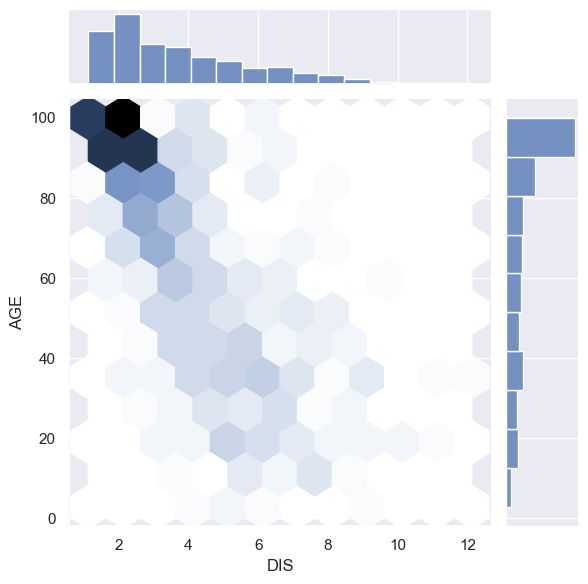

In [59]:
## on peut représenter ces résultats sous différentes formes avec le paramètre kind
## par exemple :
sns.jointplot(y=data["AGE"], x=data["DIS"], kind="hex")

Si on compare le scatterplot en point et celui ci-dessus, on voit que :
- que la forme hex permet de mieux voir les concentrations de points,
- estime un peut mieux la forme de la corrélation, visuellement,
- pas d'information sur la construction des hexagones,
- plus il y a d'observation, plus l'hexagon est par défaut plus foncé que s'il y avait moins d'observation.

**Remarque** : bien qu'un scatterplot permet de voir la distribution, notamment les outliers, un histogram est primordial pour bien comprendre et définir la distribution. L'histogram permet notamment de voir les outliers, la forme de la distribution etc.

In [60]:
sns.jointplot? ## en savoir plus sur la fonction ...

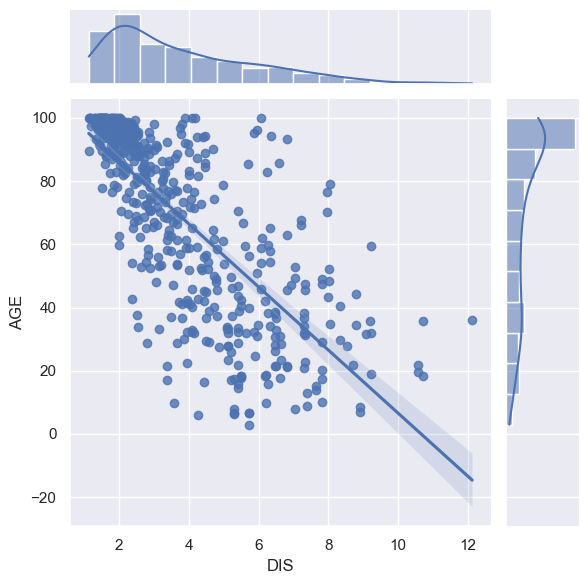

In [63]:
## Créer une régression linéaire :
sns.jointplot(y=data["AGE"], x=data["DIS"], kind="reg")

A noter qu'ici la régression linéaire n'est pas justifiée !
Pour le moment nous n'avons pas estimé de lien linéaire entre les variables. Ce graphique est à titre illustratif.
Qu'est-ce qu'une régression linéaire ? C'est une équation de droite qui permet d'estimer la valeur d'une variable tenant compte à la fois de la valeur initiale de cette variable et d'une marge d'erreur. Elle permet donc de faire des "prédictions".

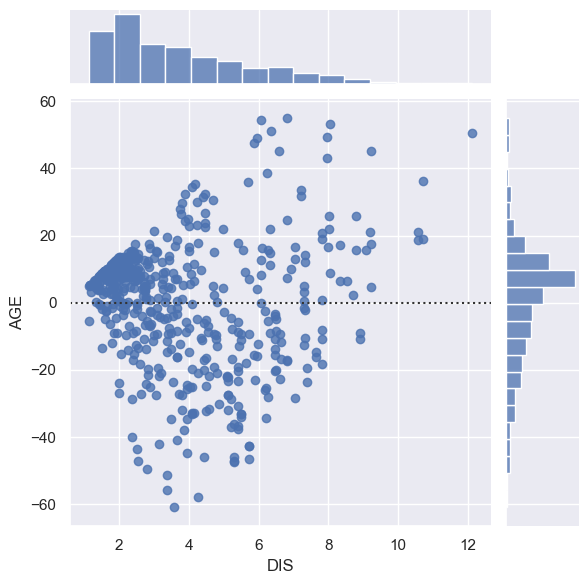

In [62]:
## Parmis les valeurs du paramètre kind, on retrouve aussi la possibilité d'afficher les résidus :
sns.jointplot(y=data["AGE"], x=data["DIS"], kind="resid")
plt.show()

Nous avons vu comment afficher des histograms pour étudier la distribution d'une variable continue.
Ensuite, nous nous sommes intéressés aux relations bivariées entre deux variables continues en affichant des scatterplots, qui peuvent prendre plusieurs formes.
Par ailleurs, ces scatterplots ne permettent pas uniquement de voir comment deux variables varient l'une par rapport à l'autre, mais aussi :
- là où il existe des concentrations dans les distributions,
- afficher une régression linéaire,
- afficher les résidus de cette régression linéaire
On va désormais s'intéresser aux représentations multivariées.

## 5. Dataviz : représentation multivariée<a class="anchor" id="ch5"></a>

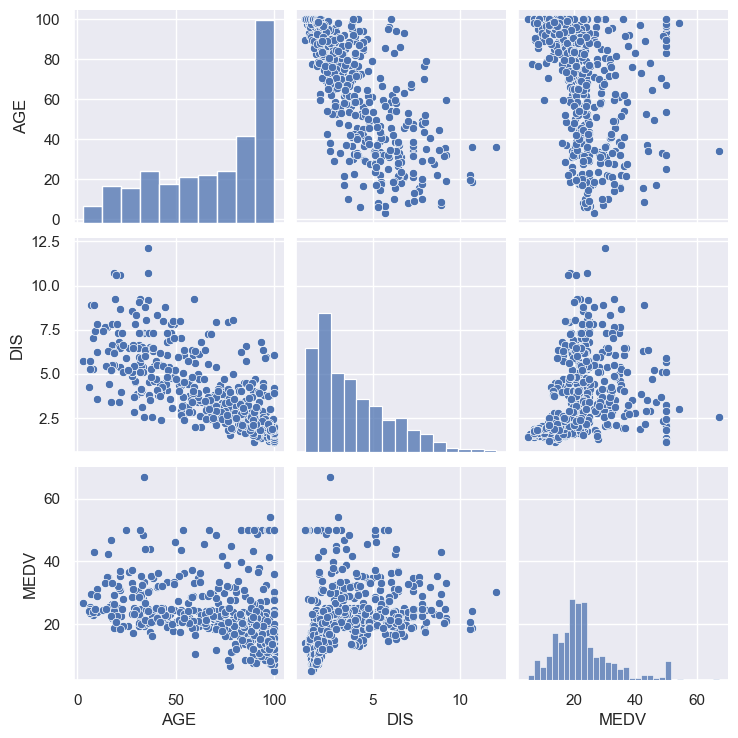

In [65]:
## Ici on va s'intéresser à l'âge, la distance au plus proche centre ville et le niveau de vie :
sns.pairplot(data[ ["AGE", "DIS", "MEDV"] ])
## pour rappel, les doubles crochets permettent de faire une sélection de variables dans le df.
plt.show()

Ce type de représentation permet de regarder quelles variables semblent liées entre elles.
En x et y, on a les noms des variables représentées.
Les représentations sont symétriques, et l'axe de symétrie correspond aux histograms. En effet, le scatterplot serait forcément linéaire ! A la place, on a les histograms qui représentent la distribution de de chaque variable étudiée.

## 6. Dataviz : ploter une variable continue et une variable catégorielle<a class="anchor" id="ch6"></a>
Qu'est-ce qu'une variables catégorielle ? : c'est une variable sur laquelle on ne peut calculer la médiane, la somme etc. Par exemple, un prénom ou une énergie (électricité, vent, etc)

### 6.1 Comparer une variable catégorielle avec un stripplot<a class="anchor" id="ch6_1"></a>

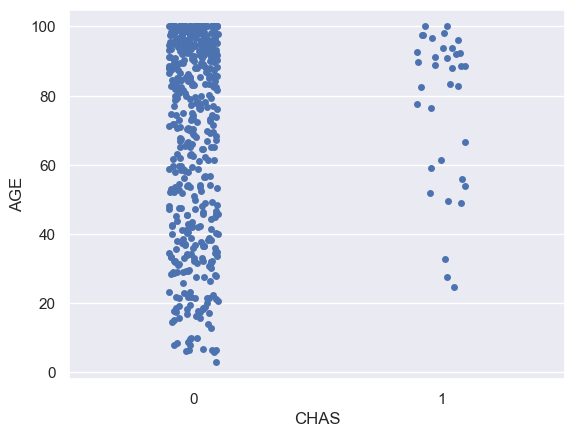

In [69]:
sns.stripplot(x=data["CHAS"], y=data["AGE"])
## A propos de la variable CHAS : CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
## http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode11.html#:~:text=Charles%20River%20dummy%20variable&text=equals%20one%20are%20districts%20that,through%20too%20many%20different%20districts.
## Charles River est une rivière. Dans le lien ci-dessus, on apprend que la proximité (sur la rive),
##+avec cette rivière influence le prix des biens : la proximité est une plue-value.

## Donc on s'attend à ce que CHAS et MEDV soient visuellement corrélés.
plt.show()

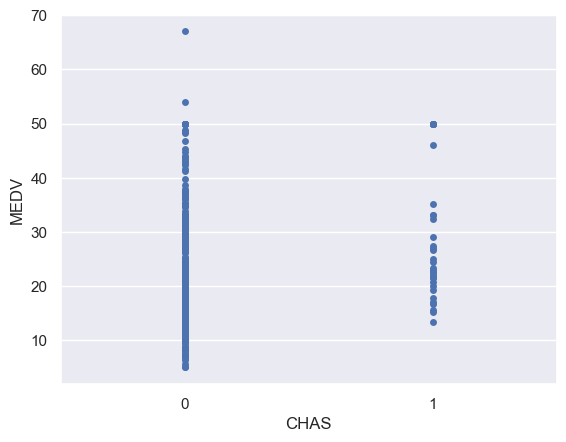

In [72]:
sns.stripplot(x=data["CHAS"], y=data["MEDV"], jitter=False)
plt.show()

On observe donc une colonne par modalité de x. Avec 0 pour indiquer que la personne n'est pas sur la rive, sinon elle est sur la rive du Charles River. On observe deux colonnes, qui ne peuvent se mélanger.
Cependant, ce genre de graphique (celui juste au(dessus) n'a pas de sens en soi. Il n'apporte pas beaucoup d'information. Pour le rendre "informatif", il faut le "tuner"/ajuster. Pour cela, on ajoute le paramètre `jitter=True`. Par défaut, ce paramètre est à True. On a indiqué `jitter=False` pour pouvoir comparer et comprendre l'importance de la visualisation. Alors que dans le premier graphique on a l'impression que toutes les valeurs sont ordonnées, on observe des dispersions et des concentrations dans le second graphique.

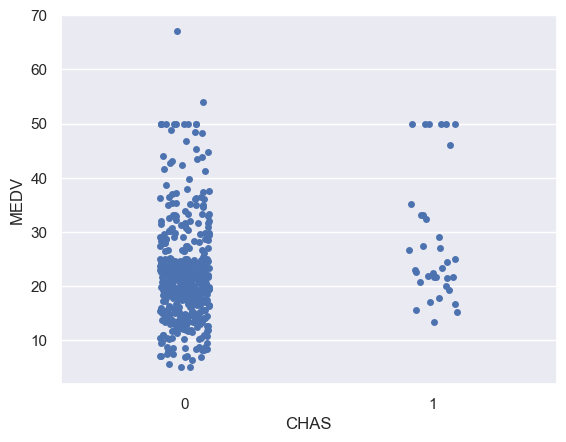

In [73]:
sns.stripplot(x=data["CHAS"], y=data["MEDV"], jitter=True)
plt.show()

On voit ici que, dans le cas d'un individu qui ne vit pas sur la rive du Charles River :
- la concentration des points se situent entre 10 et 25 milliers de dollars. ça informe donc sur le niveau de vie le plus représentés dans ce dataset, pour les individus hors de la rive.
- On voit également qu'il y a quelques valeurs extrêmes.

Concernant le niveau de vie sur la rive du Charles River :
- Il y a peu d'individus localisés à cet endroit,
- 50 mille dollars constitue le plafond du niveau de vie des indvidus. La majorité des individus est au-dessus de 10 mille dollars et en dessous de 40 mille dollars.

En somme ce type de représentation permet de comparer les individus par rapport à une variable catégorielle mais n'informe en rien sur la distribution de celle-ci ! Pour cela, on utilise un swarmplot.

### 6.2 Comparer la distribution d'une variable catégorielle avec un swarmplot<a class="anchor" id="ch6_2"></a>

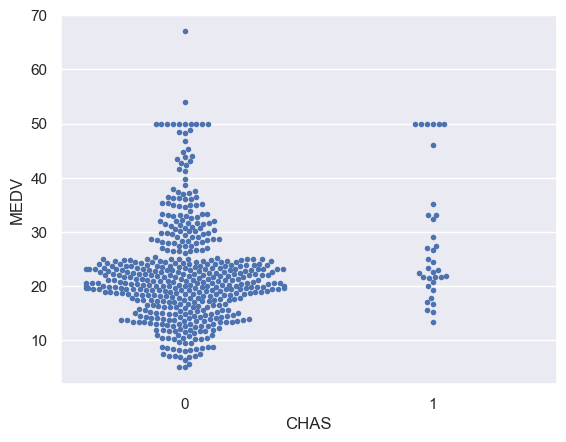

In [77]:
sns.swarmplot(x=data["CHAS"], y=data["MEDV"], size=4)
plt.show()

On a une alerte : tous les points ne peuvent être affichés. On peut opérer des transformations visuelles (changement de taille des points, suppression d'une partie du jeu de données).
Ce type de représentation informe beaucoup plus sur :
- la distribution,
- la répartition des points (ça confirme ce qu'on disait plus haut sur la concentration du nombre d'individus et leur niveau de vie),
- la distribution semble asymétrique,
- on voit des valeurs extrêmes et ce qu'on supposerait être des outliers (valeur supérieur aux valeurs des moustaches d'une bocxplot - Q3 + 1.5 * IQR).

Cependant, pour ce qui est des outliers, on ne peut pas vraiment le savoir avec une telle représentation ... Il faut donc se tourner vers un boxplot pour mieux comprendre la distribution de cette variable catégorielle et du niveau de vie.

### 6.3 Comparer la distribution d'une variable catégorielle avec un boxplot<a class="anchor" id="ch6_3"></a>

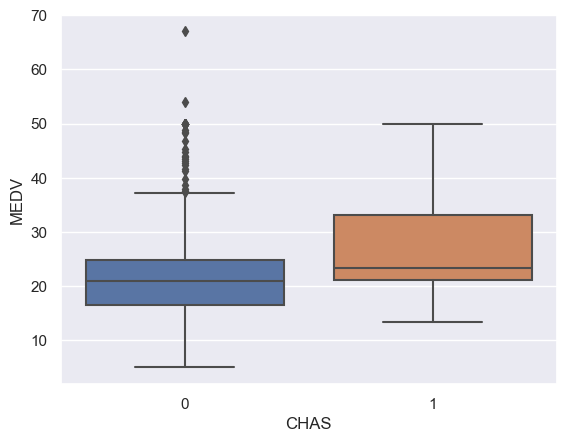

In [79]:
sns.boxplot(x=data["CHAS"], y=data["MEDV"])
plt.show()

**Quelques rappels sur la logique des boxplot** :
- les outliers : valeur supérieur/inférieure aux valeurs des moustaches d'une boxplot.
- Pour la moustache haute : Q3 + 1.5 * IQR.
- Pour la moustache basse : Q1 - 1.5 * IQR.

### 6.4 Comparer la distribution d'une variable catégorielle avec un boxplot + hue<a class="anchor" id="ch6_4"></a>

Qu'est-ce que le "hue" ? Il s'agit d'un paramètre de la méthode sns.boxplot() permettant d'ajouter une variable catégorielle supplémentaire. Il permet de nuancer les résultats du boxplot selon une autre variable catégorielle. Par exemple : on voudrait connaître le niveau de vie moyen en fonction de la localisation sur la rive ou pas, sur plusieurs portions de cette rive.
Ou bien, on voudrait connaître le revenue médian selon le sexe, dans chaque commune d'Île-de-France.

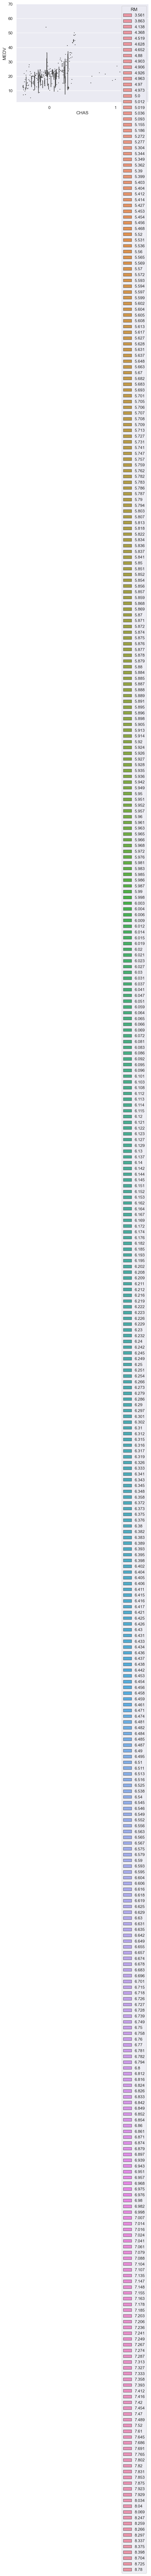

In [83]:
sns.boxplot(x=data["CHAS"], y=data["MEDV"], hue=data["RM"])
plt.show()

A noter que ce graphique ne nous apporte pas grande information ... La variable RM n'est pas catégorielle d'une part, d'autre part elle informe sur le nombre de pièces moyen dans les lotissements. En revanche, on sait qu'il est possible d'avoir, pour chaque valeur de hue, un boxplot !

### 6.5 Comparer la dispersion d'une variable continue en fonction d'une variable catégorielle avec un barplot + hue<a class="anchor" id="ch6_5"></a>

Précédemment, nous avons vu comment représenter la distribution de variables catégorielles et continue. On a beaucoup de valeur. Imaginons par exemple qu'on ait vraiment beaucoup de catégorie. On voudrait estimer la quantité, pour chaque catégorie, d'une variable continue. Pour ça, on utilise un barplot. Il s'agit donc d'une agrégation de données, et cela mérite une "marge d'erreur". Ainsi, les barplot de seaborn intègrent naturellement la visualisation de cette marge d'erreur.

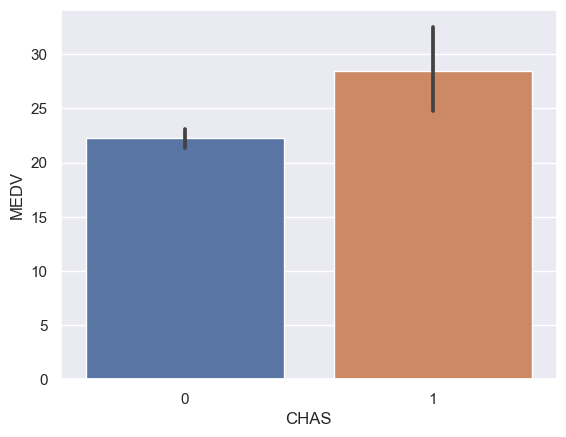

In [86]:
sns.barplot(x=data["CHAS"], y=data["MEDV"]) ## possède aussi un paramètre hue.
plt.show()

On voit que le niveau de vie est plus élevé quand on est sur la rive du Charles River. Mais la marge d'erreur est plus élevée que pour le niveau de vie hors de la rive.

Ce genre de graphique donne une idée de la dispersion pour chaque modalité testée. On pourrait également ajouter le paramètre hue, qui, comme pour le boxplot, permet de comparer la dispersion d'une variable continue selon les modalités d'une variable catégorielle, pour chaque modalité du hue.

Donc là, on a mesuré des quantités pour une variable catégorielle à plusieurs modalités. Mais, pour faire des opérations statistiques, nous aurions besoin de connaître la distribution (fréquence) de cette variable. Pour cela, on réalise un countplot au lieu d'un barplot.

### 6.6 Inspecter la distribution d'une variable catégorielle avec un countplot<a class="anchor" id="ch6_6"></a>

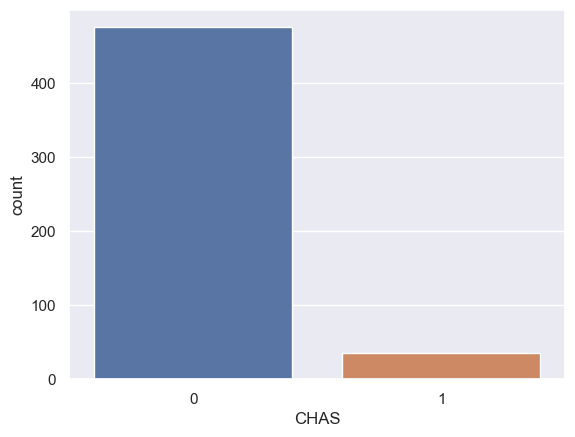

In [8]:
sns.countplot(x=data["CHAS"]) ## on précise x.
plt.show()

`sns.countplot?` : permet d'obtenir la documentation de la fonction.  
Dans la documentation, on peut voir qu'on peut ajouter une variable y. Dans la pratique, nous on a utilisé que le paramètre x, et il permet de représenter la distribution pour une variable catégorielle. Etant donné que l'on a que deux modalités, il y a deux modalités qui sont mesurées. De manière générale, [**pourquoi regarder la distribution d'une variable catégorielle ?**](https://stats.libretexts.org/Courses/Las_Positas_College/Math_40%3A_Statistics_and_Probability/02%3A_Frequency_Distributions_and_Graphs/2.04%3A_Frequency_Distributions#:~:text=A%20categorical%20frequency%20distribution%20is,%2D%20or%20ordinal%2Dlevel%20data.&text=A%20relative%20frequency%20is%20the,the%20total%20number%20of%20outcomes.) Une telle distribution peut concerner des variables ordinales (ordonnées, classement par exemple) ou nominales (prénoms par exemple). Ainsi, on peut voir comment une variable est "distribuée".



### 6.7 Etudier l'évolution d'une variable continue selon une variable catégorielle avec pointplot<a class="anchor" id="ch6_7"></a>

Jusque-là, on a pu comparer des distributions pour plusieurs modalités d'une variable. Ce qui tombait bien pour la variable CHAS. Le pointplot permet d'estimer la valeur moyenne d'une variable pour une modalité. Il permet également de visualiser la "marge d'erreur" d'estimation de la valeur moyenne. Voir cet [article](https://www.geeksforgeeks.org/python-seaborn-pointplot-method/) qui explique plutôt bien les usages, avec plus de précisions ...

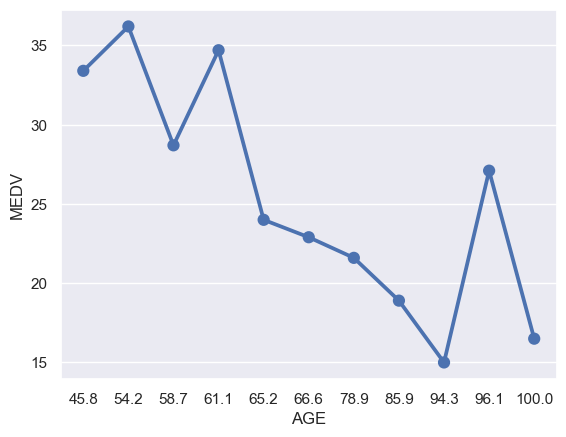

In [17]:
sns.pointplot(x=data.loc[0:10, "AGE"], y=data.loc[0:10, "MEDV"], estimator="mean", errorbar=("ci", 95))
plt.show()

On regarde là la variation du niveau de vie en millier d'euros selon l'âge, sur les 10 premiers individus. Pour **rappel** la méthode .loc[] permet de sélectionner tout ou partie d'un dataframe et une de ses variables. Le premier argument correspond à l'index des individus, et la seconde, la variable sélectionnée. Il sera aussi, plus intéressant de pouvoir grouper les âges par intervalle et observer le niveau de vie moyen pour chaque intervalle d'âge. Nous on n'a pas de errorbar affiché, puisqu'on fait correspondre à chaque individu un âge et son niveau de vie.

In [34]:
data["AGE"].unique().shape ## 357
data.shape ## (511, 14)
## on voit que le nombre de valeur unique pour l'âge est inférieur au nombre d'individus dans le dataset.
## On va donc opérer un groupement :
temp = data[["AGE", "MEDV"]].groupby("AGE")["MEDV"].mean()
temp.head()

## https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

AGE
2.9    26.60
6.0    24.10
6.2    23.40
6.5    24.70
6.6    24.75
Name: MEDV, dtype: float64

Donc là on a crée une serie pandas au lieu d'un dataframe. C'est plutôt intéressante de voir comment utiliser un serie pandas dans seaborn. On peut voir qu'il y a quelques décalages dans la manipulation, mais les fonctions restent les mêmes. On obtient l'index avec la méthode .index et les données sont appelées avec le nom de la serie. De plus, on accède aux informations via la méthode .iloc[] qui référence directement les index et non les noms de champs (comme pour un df).

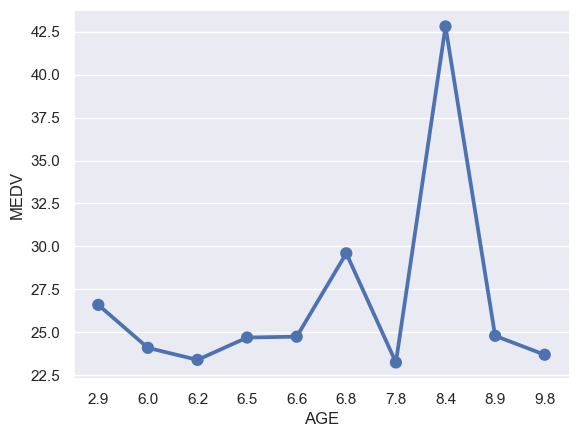

In [52]:
sns.pointplot(x=temp.iloc[0:10].index, y=temp.iloc[0:10], estimator="mean", errorbar=("ci", 95))
plt.show()